In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
import tabulate
from sklearn import metrics

In [2]:
# Loading dataset
HD = pd.read_csv('Heart_Disease_Prediction.csv')
HD.head(60)

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [3]:
HD.tail(60)

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
210,210,59,1,1,170,288,0,2,159,0,0.2,2,0,7,Presence
211,211,51,1,3,125,245,1,2,166,0,2.4,2,0,3,Absence
212,212,43,0,3,122,213,0,0,165,0,0.2,2,0,3,Absence
213,213,58,1,4,128,216,0,2,131,1,2.2,2,3,7,Presence
214,214,29,1,2,130,204,0,2,202,0,0.0,1,0,3,Absence
215,215,41,0,2,130,204,0,2,172,0,1.4,1,0,3,Absence
216,216,63,0,3,135,252,0,2,172,0,0.0,1,0,3,Absence
217,217,51,1,3,94,227,0,0,154,1,0.0,1,1,7,Absence
218,218,54,1,3,120,258,0,2,147,0,0.4,2,0,7,Absence
219,219,44,1,2,120,220,0,0,170,0,0.0,1,0,3,Absence


In [4]:
print(HD.columns)

Index(['index', 'Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol',
       'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina',
       'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium',
       'Heart Disease'],
      dtype='object')


In [5]:
# Delete the index column
HD = HD.drop('index', axis=1)

# Save the updated DataFrame as a new dataset
HD.to_csv('my_updated_dataset.csv', index=False)

In [6]:
HD['Heart Disease'].replace({'Presence': 1, 'Absence': 0}, inplace=True)
HD.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [7]:
#Checking for missing values in dataset
HD.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Chest pain type'}>,
        <AxesSubplot:title={'center':'BP'}>],
       [<AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'FBS over 120'}>,
        <AxesSubplot:title={'center':'EKG results'}>,
        <AxesSubplot:title={'center':'Max HR'}>],
       [<AxesSubplot:title={'center':'Exercise angina'}>,
        <AxesSubplot:title={'center':'ST depression'}>,
        <AxesSubplot:title={'center':'Slope of ST'}>,
        <AxesSubplot:title={'center':'Number of vessels fluro'}>],
       [<AxesSubplot:title={'center':'Thallium'}>,
        <AxesSubplot:title={'center':'Heart Disease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

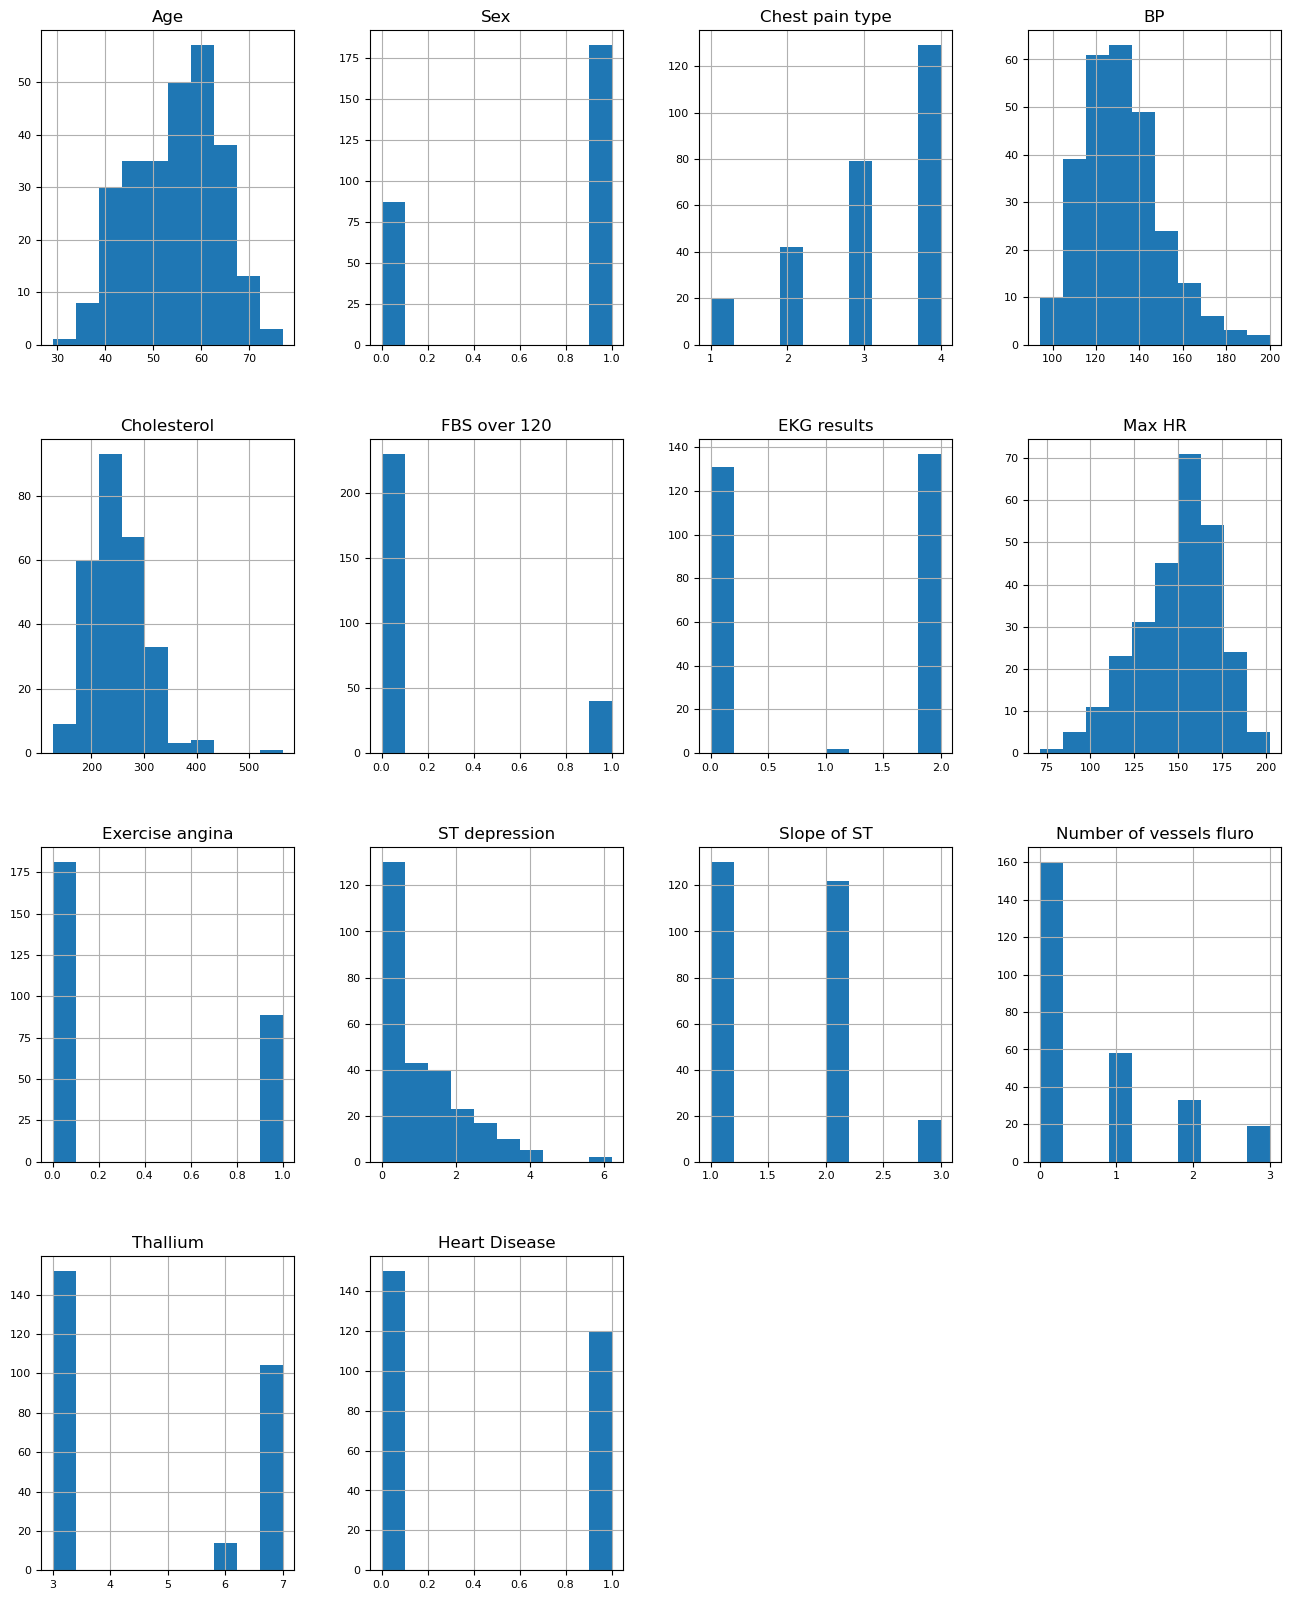

In [8]:
# Dataset general overview of distribution
HD.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

Distribution of sex (gender) between men and women

In [9]:
class_counts = HD['Sex'].value_counts() # Male=1, Female=0

print(class_counts)

1    183
0     87
Name: Sex, dtype: int64


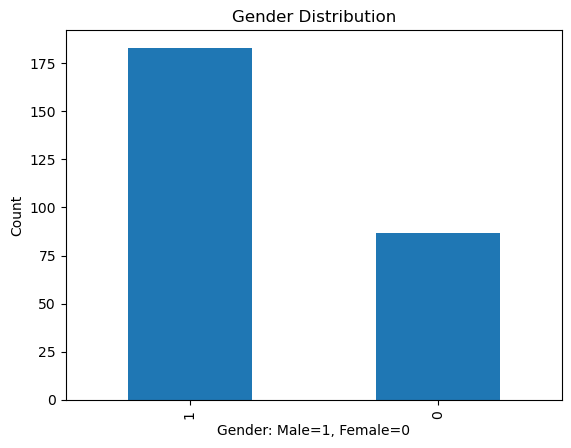

In [10]:
class_counts = HD['Sex'].value_counts()

class_counts.plot(kind='bar')

plt.title('Gender Distribution')
plt.xlabel('Gender: Male=1, Female=0')
plt.ylabel('Count')

plt.show()

In [11]:
class_counts = HD['Heart Disease'].value_counts()
print(class_counts)

0    150
1    120
Name: Heart Disease, dtype: int64


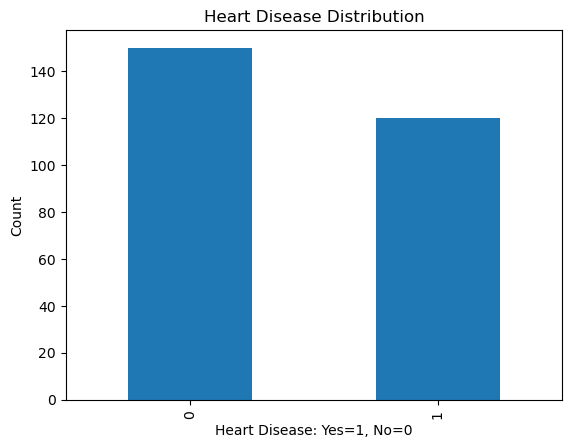

In [12]:
class_counts = HD['Heart Disease'].value_counts()
class_counts.plot(kind='bar')
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease: Yes=1, No=0')
plt.ylabel('Count')
plt.show()

In [13]:
class_counts = HD['Exercise angina'].value_counts()
print(class_counts)

0    181
1     89
Name: Exercise angina, dtype: int64


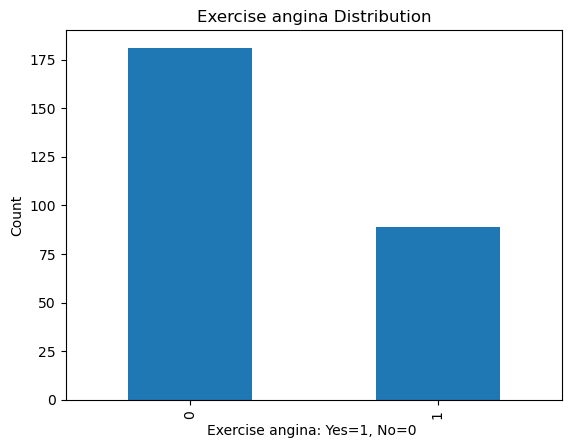

In [14]:
class_counts = HD['Exercise angina'].value_counts()
class_counts.plot(kind='bar')
plt.title('Exercise angina Distribution')
plt.xlabel('Exercise angina: Yes=1, No=0 ')
plt.ylabel('Count')
plt.show()

In [15]:
class_counts = HD['FBS over 120'].value_counts()
print(class_counts)

0    230
1     40
Name: FBS over 120, dtype: int64


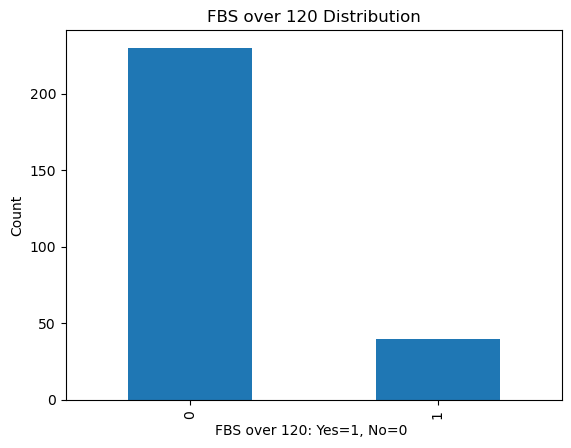

In [16]:
class_counts = HD['FBS over 120'].value_counts()

class_counts.plot(kind='bar')

plt.title('FBS over 120 Distribution')
plt.xlabel('FBS over 120: Yes=1, No=0 ')
plt.ylabel('Count')

plt.show()

In [17]:
# Calculate the balance ratio
class_counts = HD['FBS over 120'].value_counts()

imbalance_ratio = class_counts.min() / class_counts.max()

print(imbalance_ratio)

0.17391304347826086


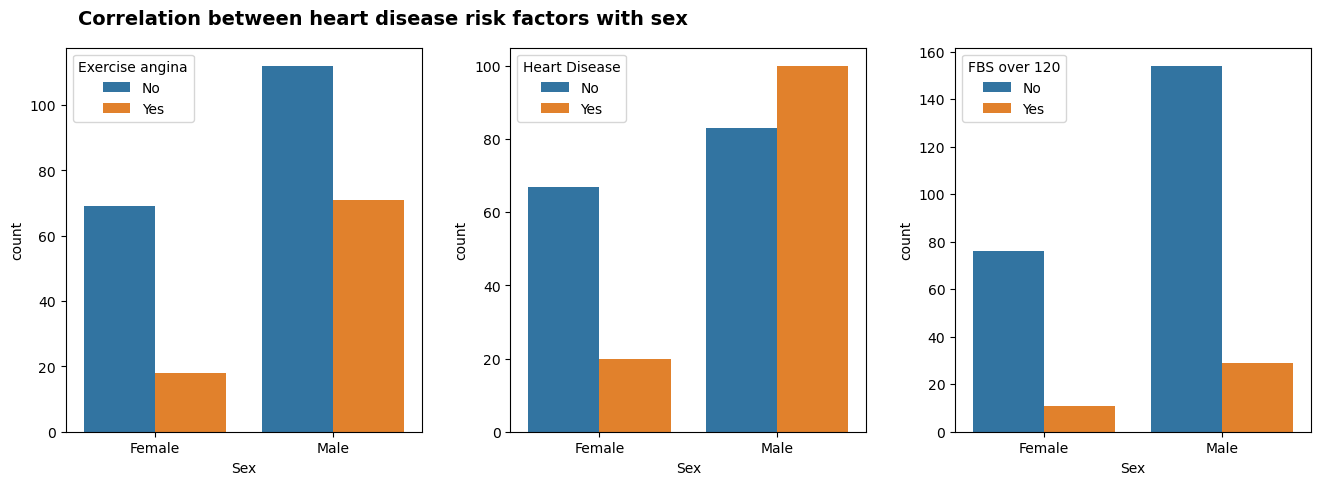

In [18]:
fig, axs = plt.subplots(ncols=3)
fig.suptitle("Correlation between heart disease risk factors with sex", fontsize=14, fontweight='bold')

for i, (feature, legend_title) in enumerate(zip(["Exercise angina", "Heart Disease", "FBS over 120"],
                                                ["Exercise angina", "Heart Disease", "FBS over 120"])):
    sns.countplot(x="Sex", hue=feature, data=HD, ax=axs[i])
    axs[i].set_xticklabels(['Female', 'Male'])
    axs[i].set_xticks([0, 1])
    handles, labels = axs[i].get_legend_handles_labels()
    axs[i].legend(handles, ['No', 'Yes'], title=legend_title, loc="upper left")

fig.subplots_adjust(left=0.005, bottom=0.1, right=1.95, top=0.9, wspace=0.25, hspace=0.35)
plt.show()

In [19]:
# To visualize the type of data type of each data column
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [20]:
# To view Statistical summary of the dtatset
HD.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [21]:
# Finding the correletion between data values
HD.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


Text(0.5, 1.0, 'Correlation Matrix of heart Disease Data')

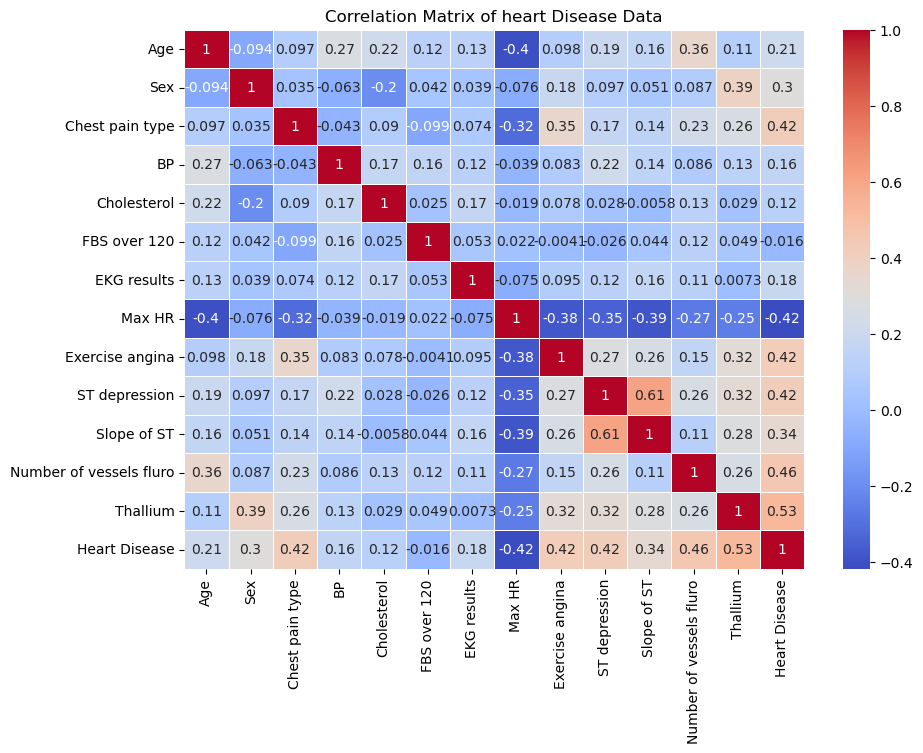

In [22]:
# Generate a correlation matrix for the dataset
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(HD.corr(), annot=True, cmap='coolwarm', linewidths=.5, ax=ax)
ax.set_title("Correlation Matrix of heart Disease Data")

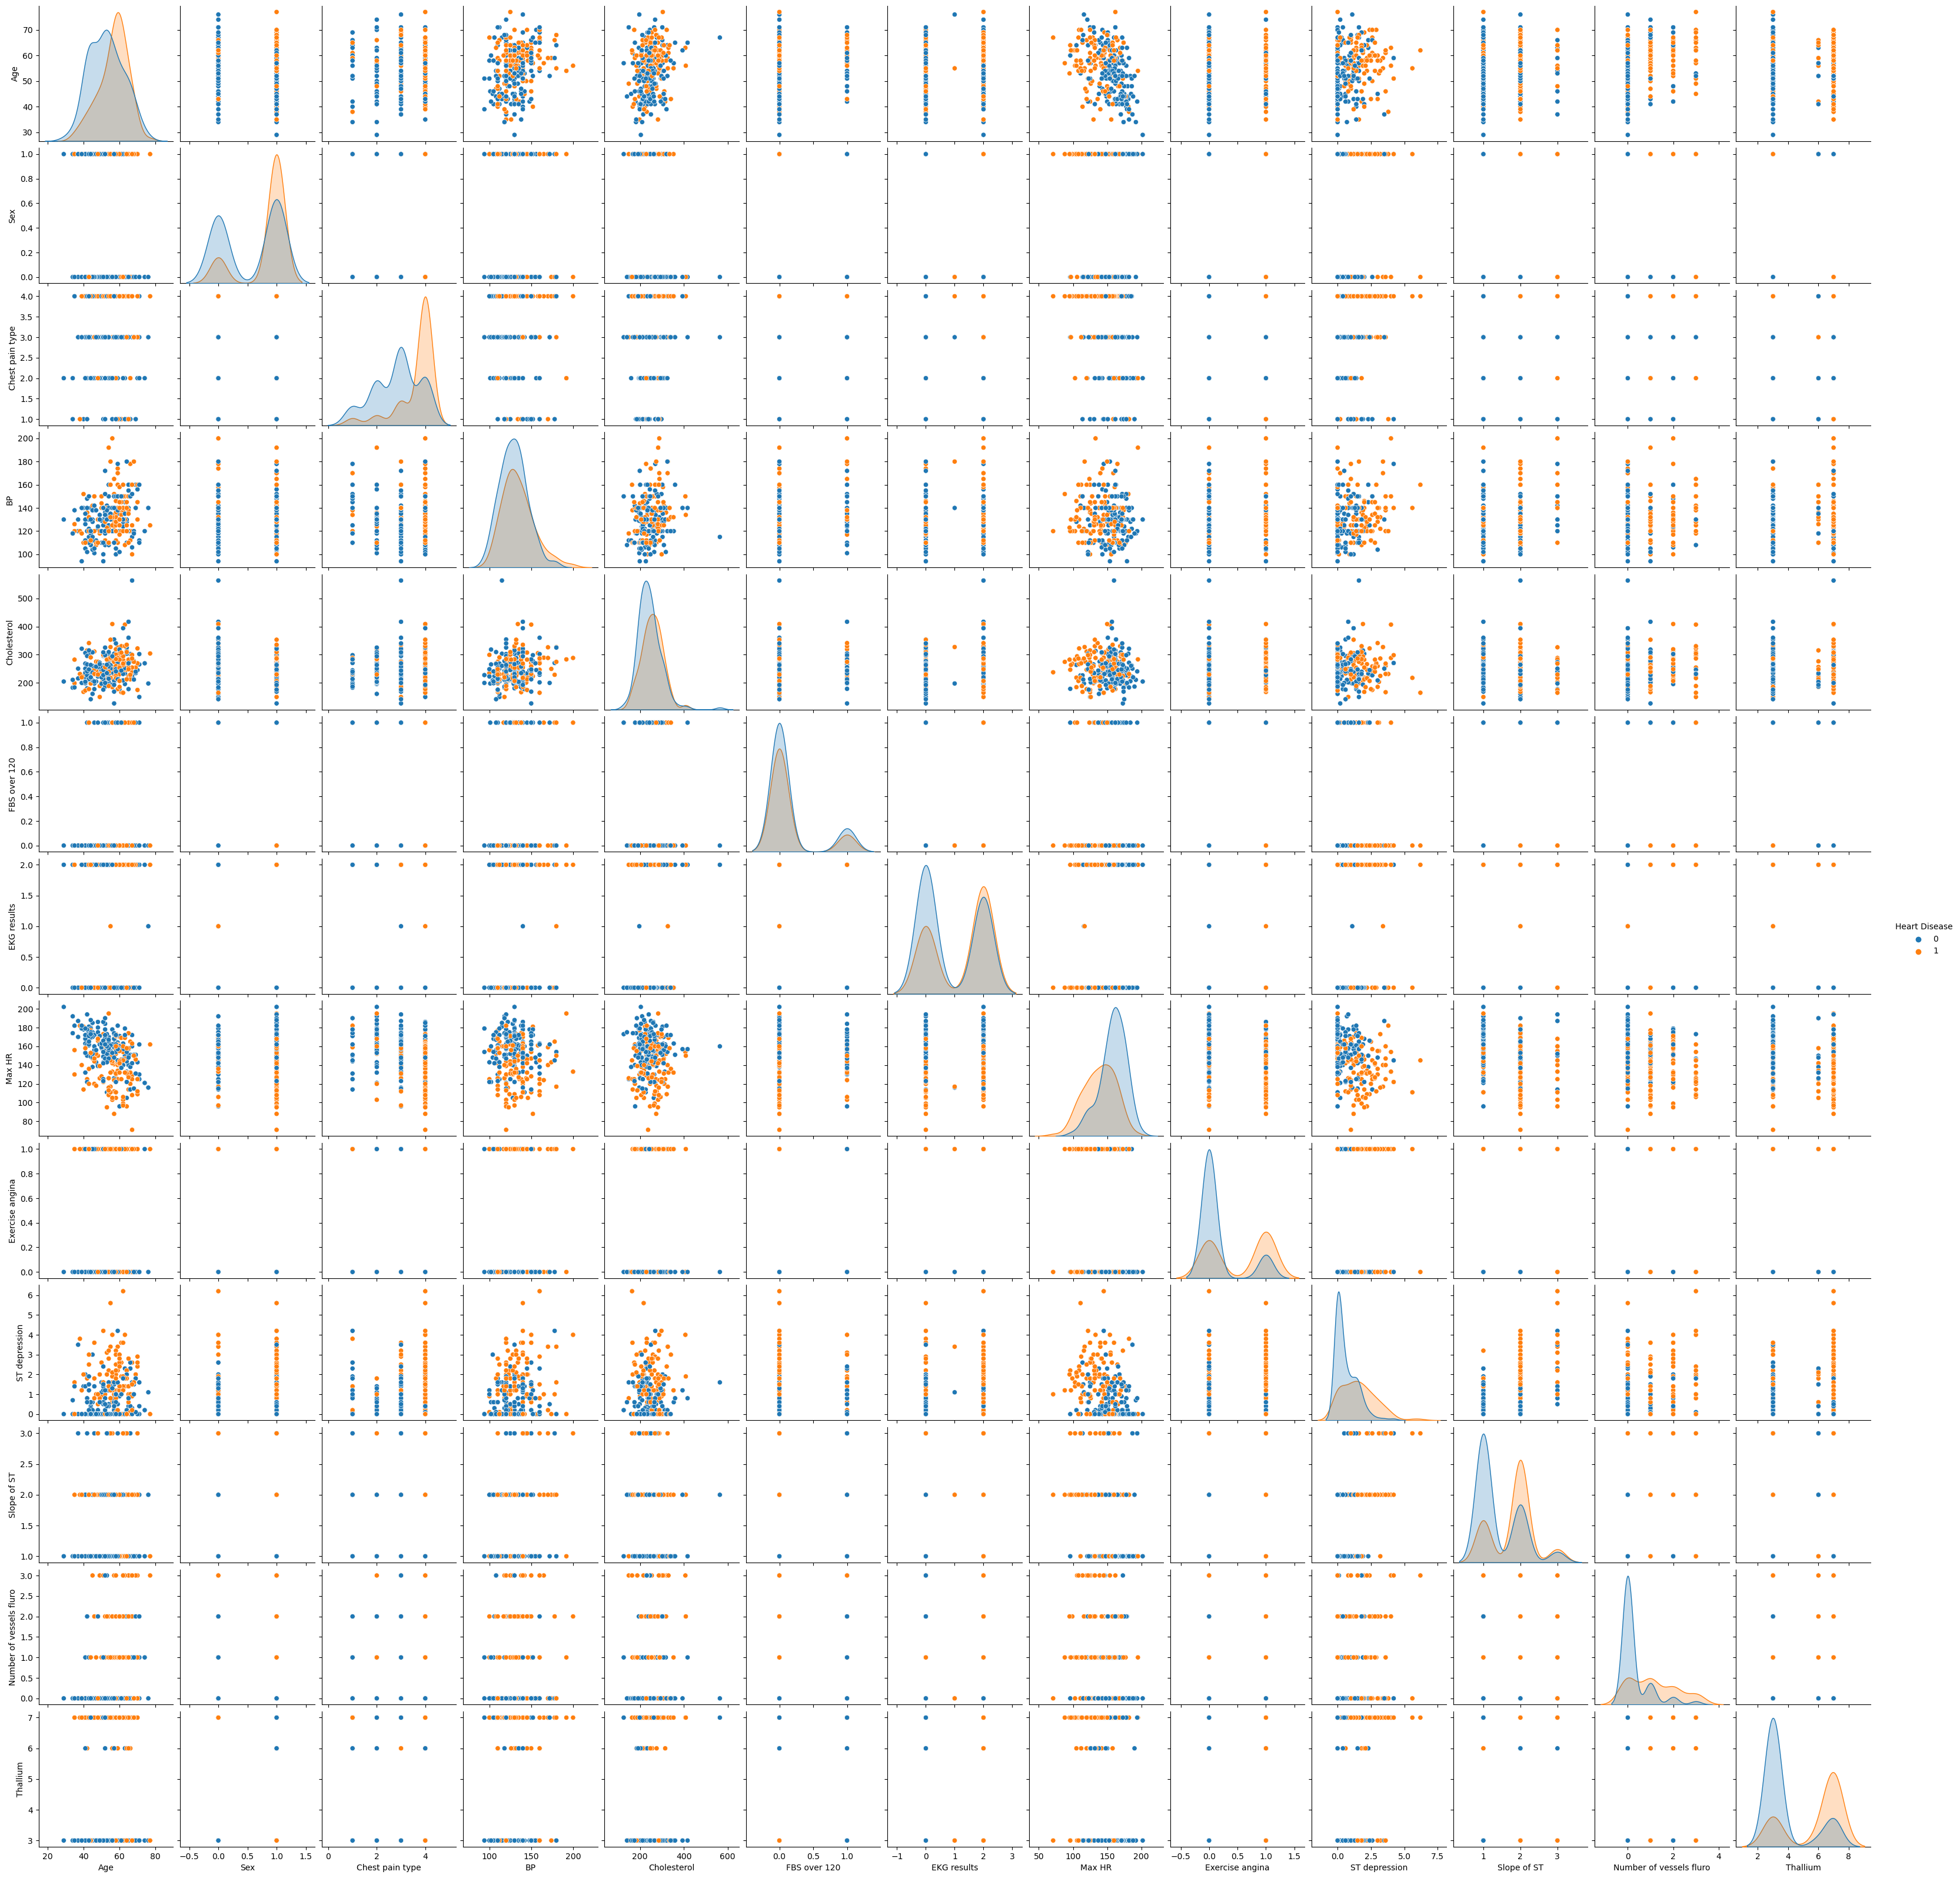

In [23]:
sns.pairplot(HD, hue='Heart Disease')

In [24]:
# Create the attribute and target data
X=HD.drop(columns=['Heart Disease'],axis=1)
Y=HD["Heart Disease"] # the target variable is in the last column
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [25]:
#Split the data into training and test data using train_test_split() function. 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=42)
print(X.shape,X_train.shape,X_test.shape)

(270, 13) (216, 13) (54, 13)


In [26]:
#Creating the SVM classification model for the whole dataset
model = svm.SVC(kernel='linear')
model.fit(X_train,Y_train)

SVC(kernel='linear')

###### Evaluating the model

In [27]:
#Evaluate using the training data
train_predict = model.predict(X_train)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_predict)*100, "%")
print("Precision on training data:", metrics.precision_score(Y_train, train_predict)*100, "%")
print("Recall on training data:", metrics.recall_score(Y_train, train_predict)*100, "%")

Accuracy on training data:  84.25925925925925 %
Precision on training data: 85.22727272727273 %
Recall on training data: 78.125 %


In [28]:
#Evaluate using the testing data
test_predict=model.predict(X_test)
print("Accuracy on testing data: ", metrics.accuracy_score(Y_test, test_predict)*100, "%")
print("Precision on testing data:", metrics.precision_score(Y_test, test_predict)*100, "%")
print("Recall on testing data: ", metrics.recall_score(Y_test, test_predict)*100, "%")

Accuracy on testing data:  85.18518518518519 %
Precision on testing data: 80.76923076923077 %
Recall on testing data:  87.5 %


In [29]:
# Tabular comparison of evaluated outcome
table = [["Metric", "Training Data", "Testing Data"],
         ["Accuracy", metrics.accuracy_score(Y_train, train_predict)*100, metrics.accuracy_score(Y_test, test_predict)*100],
         ["Precision", metrics.precision_score(Y_train, train_predict)*100, metrics.precision_score(Y_test, test_predict)*100],
         ["Recall", metrics.recall_score(Y_train, train_predict)*100, metrics.recall_score(Y_test, test_predict)*100]]

# Print the table
print(tabulate.tabulate(table, headers="firstrow"))

Metric       Training Data    Testing Data
---------  ---------------  --------------
Accuracy           84.2593         85.1852
Precision          85.2273         80.7692
Recall             78.125          87.5


TN=25, FP=5, FN=3, TP=21


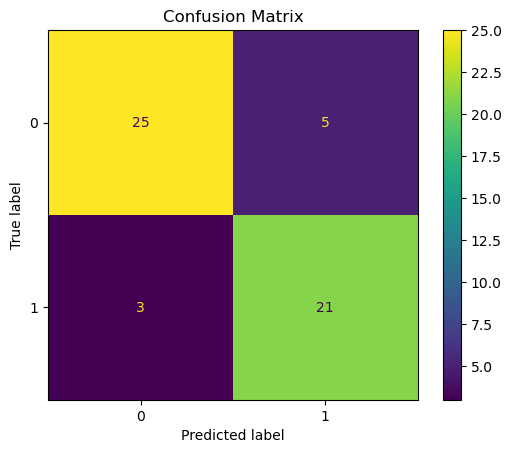

In [30]:
# Calculate the confusion matrix
cm = metrics.confusion_matrix(Y_test, test_predict)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))

# Create the confusion matrix plot
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Add a title to the plot
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [31]:
calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
print("Calculated accuracy = ", calculated_accuracy*100, "%")
print("Calculated precision = ", calculated_precision*100, "%")
print("Calculated recall = ", calculated_recall*100, "%")

Calculated accuracy =  85.18518518518519 %
Calculated precision =  80.76923076923077 %
Calculated recall =  87.5 %


#### GROUP UNAWARE

In [32]:
#Group Unaware, Drop the Gender parameter from X_train and X_test
X_train_group_unaware = X_train.drop(columns=['Sex'])
X_test_group_unaware = X_test.drop(columns=['Sex'])

In [33]:
#Train a new SVM model:
model_group_unaware = svm.SVC(kernel='linear')
model_group_unaware.fit(X_train_group_unaware,Y_train)

SVC(kernel='linear')

#### CREATING A CLASSIFICATION REPORT FOR GROUP UNAWARE

In [34]:
# Evaluate using the Training data
train_predict_group_unaware=model_group_unaware.predict(X_train_group_unaware)
print("Accuracy on train data: ", metrics.accuracy_score(Y_train, train_predict_group_unaware)*100, "%")
print("Precision using train data:", metrics.precision_score(Y_train, train_predict_group_unaware)*100, "%")
print("Recall using train data:", metrics.recall_score(Y_train, train_predict_group_unaware)*100, "%")

Accuracy on train data:  87.03703703703704 %
Precision using train data: 89.53488372093024 %
Recall using train data: 80.20833333333334 %


In [35]:
# Evaluate using the Test data
test_predict_group_unaware=model_group_unaware.predict(X_test_group_unaware)
print("Accuracy on test data: ", metrics.accuracy_score(Y_test, test_predict_group_unaware)*100, "%")
print("Precision using test data:", metrics.precision_score(Y_test, test_predict_group_unaware)*100, "%")
print("Recall on testing data: ", metrics.recall_score(Y_test, test_predict_group_unaware)*100, "%")

Accuracy on test data:  83.33333333333334 %
Precision using test data: 80.0 %
Recall on testing data:  83.33333333333334 %


In [36]:
# Tabular display of the evaluated metrix of the group unaware 
table = [["Metric", "Training Data", "Testing Data"],
         ["Accuracy", metrics.accuracy_score(Y_train, train_predict_group_unaware)*100, metrics.accuracy_score(Y_test, test_predict_group_unaware)*100],
         ["Precision", metrics.precision_score(Y_train, train_predict_group_unaware)*100, metrics.precision_score(Y_test, test_predict_group_unaware)*100],
         ["Recall", metrics.recall_score(Y_train, train_predict_group_unaware)*100, metrics.recall_score(Y_test, test_predict_group_unaware)*100]]

# Print the table
print(tabulate.tabulate(table, headers="firstrow"))

Metric       Training Data    Testing Data
---------  ---------------  --------------
Accuracy           87.037          83.3333
Precision          89.5349         80
Recall             80.2083         83.3333


#### SPLITTING THE TRUE AND PREDICTED VALUES INTO MALE AND FEMALE GROUPS

In [37]:
# Check the Gender parameter [Protected Characteristics]and extract the indices where the values are 1.0 [Male] and 0.0 [Female]
PROTECTED = "Sex"
MEN = 1.0 #male
WOMEN = 0.0 #women
men_indices = np.where(X_test[PROTECTED] == MEN)[0]
women_indices = np.where(X_test[PROTECTED] == WOMEN)[0]
print(men_indices, "No of Men =", men_indices.size)
print(women_indices, "No of Women =", women_indices.size)

[ 1  2  3  4  5  6  7  8 10 11 12 13 14 15 19 21 24 25 26 27 29 31 33 36
 38 40 43 44 46 47 48 49 51 52 53] No of Men = 35
[ 0  9 16 17 18 20 22 23 28 30 32 34 35 37 39 41 42 45 50] No of Women = 19


In [38]:
# Extract the actual outcomes for the two groups. We will use the indices to split Y_test into two groups (one for Male and one for Female)
# using the indices to split Y_test into two groups (one for Maleand one for Female)
Y_test_male = [Y_test.values[i] for i in men_indices]
Y_test_female = [Y_test.values[i] for i in women_indices]
print(Y_test_male)
print(Y_test_female)

[0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1]


In [39]:
# Extract the predicted outcomes for the two groups
test_predict_male = [test_predict[i] for i in men_indices]
test_predict_female = [test_predict[i] for i in women_indices]
print(test_predict_male)
print(test_predict_female)

[0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1]
[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]


In [40]:
from sklearn import metrics

TN_male=12, FP_male=5, FN_male=2, TP_male=16


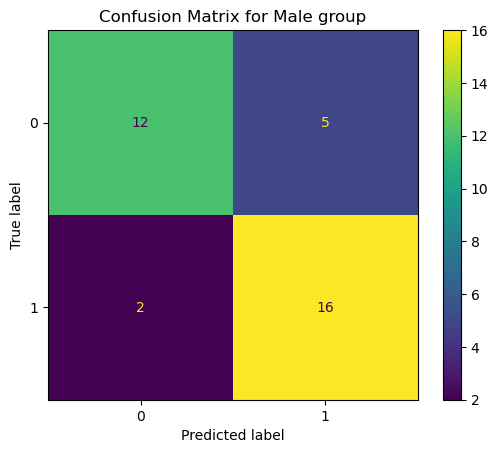

              precision    recall  f1-score   support

           0       0.86      0.71      0.77        17
           1       0.76      0.89      0.82        18

    accuracy                           0.80        35
   macro avg       0.81      0.80      0.80        35
weighted avg       0.81      0.80      0.80        35



In [41]:
cm_male = metrics.confusion_matrix(Y_test_male, test_predict_male)
TN_male, FP_male, FN_male, TP_male = cm_male.ravel()
print("TN_male={0}, FP_male={1}, FN_male={2}, TP_male={3}".format(TN_male, FP_male, FN_male, TP_male))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_male)
disp.plot()
plt.title('Confusion Matrix for Male group')
plt.show()


print(metrics.classification_report(Y_test_male, test_predict_male))

In [42]:
#Checking for Equal Accuracy, Demographic Parity and Equal Opportunity
Calculated_Accuracy_male = (𝑇𝑃_male+𝑇𝑁_male)/(𝑇𝑃_male+𝑇𝑁_male+𝐹𝑃_male+𝐹𝑁_male)
Calculated_Demographic_Parity_male = (𝑇𝑃_male+𝐹𝑃_male)/(𝑇𝑃_male+𝑇𝑁_male+𝐹𝑃_male+𝐹𝑁_male)
Calculated_Equal_Opportunity_male = 𝑇𝑃_male/(𝑇𝑃_male+𝐹𝑁_male)

print(f"Equal Accuracy for male group = {Calculated_Accuracy_male*100}")
print(f"Demographic Parity for male group = {Calculated_Demographic_Parity_male*100}")
print(f"Equal Opportunity for male group = {Calculated_Equal_Opportunity_male*100}")

Equal Accuracy for male group = 80.0
Demographic Parity for male group = 60.0
Equal Opportunity for male group = 88.88888888888889


In [43]:
from sklearn import metrics

TN_female=13, FP_female=0, FN_female=1, TP_female=5


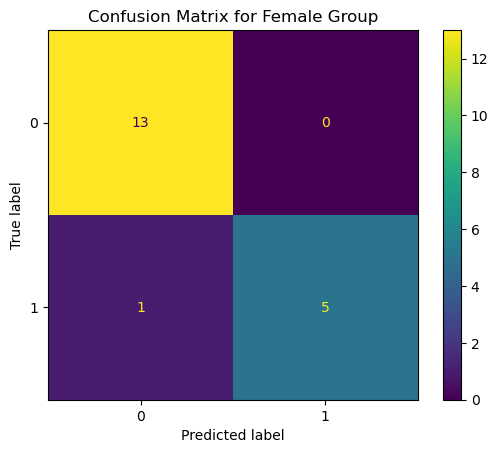

In [44]:
# computing the confusion matrix for the f groups
cm_female= metrics.confusion_matrix(Y_test_female, test_predict_female)
TN_female, FP_female, FN_female, TP_female = cm_female.ravel()
print("TN_female={0}, FP_female={1}, FN_female={2}, TP_female={3}".format(TN_female, FP_female, FN_female, TP_female))
disp =metrics.ConfusionMatrixDisplay(confusion_matrix=cm_female)
disp.plot()
plt.title('Confusion Matrix for Female Group')
plt.show()

In [45]:
print(metrics.classification_report(Y_test_female, test_predict_female))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.83      0.91         6

    accuracy                           0.95        19
   macro avg       0.96      0.92      0.94        19
weighted avg       0.95      0.95      0.95        19



In [46]:
#Checking for Equal Accuracy, Demographic Parity and Equal Opportunity
Calculated_Accuracy_female = (𝑇𝑃_female+𝑇𝑁_female)/(𝑇𝑃_female+𝑇𝑁_female+𝐹𝑃_female+𝐹𝑁_female)
Calculated_Demographic_Parity_female = (𝑇𝑃_female+𝐹𝑃_female)/(𝑇𝑃_female+𝑇𝑁_female+𝐹𝑃_female+𝐹𝑁_female)
Calculated_Equal_Opportunity_female = 𝑇𝑃_female/(𝑇𝑃_female+𝐹𝑁_female)

print(f"Equal Accuracy for female group = {Calculated_Accuracy_female*100}")
print(f"Demographic Parity for female group = {Calculated_Demographic_Parity_female*100}")
print(f"Equal Opportunity for female group = {Calculated_Equal_Opportunity_female*100}")

Equal Accuracy for female group = 94.73684210526315
Demographic Parity for female group = 26.31578947368421
Equal Opportunity for female group = 83.33333333333334


In [47]:
table = [["Metric", "Male", "Female"],
         ["Equal Accuracy", Calculated_Accuracy_male*100, Calculated_Accuracy_female*100],
         ["Demographic Parity", Calculated_Demographic_Parity_male*100, Calculated_Demographic_Parity_female*100],
         ["Equal Opportunity", Calculated_Equal_Opportunity_male*100, Calculated_Equal_Opportunity_female*100]]

# Print the table
print(tabulate.tabulate(table, headers="firstrow"))

Metric                 Male    Female
------------------  -------  --------
Equal Accuracy      80        94.7368
Demographic Parity  60        26.3158
Equal Opportunity   88.8889   83.3333


In [48]:
# Convert the table to a numpy array
data = np.array(table[1:])

In [49]:
# Extract the metric names, male scores, and female scores from the data
metrics = data[:,0]
male_scores = data[:,1].astype(float)
female_scores = data[:,2].astype(float)

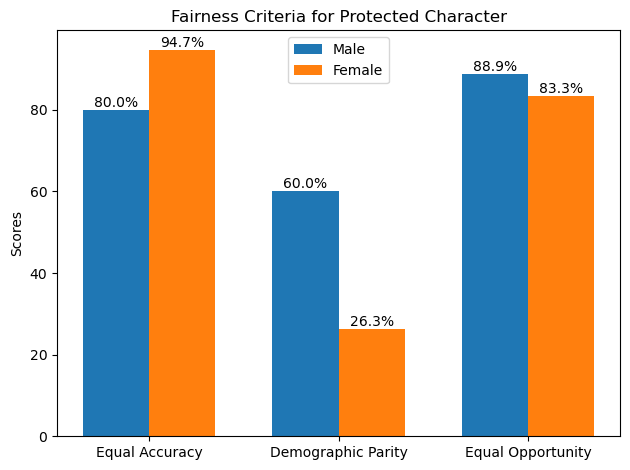

In [50]:
# Create the bar chart
fig, ax = plt.subplots()
x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars
rects1 = ax.bar(x - width/2, male_scores, width, label='Male')
rects2 = ax.bar(x + width/2, female_scores, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Fairness Criteria for Protected Character')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add the score values as text above the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

# Adjust the layout and display the plot
fig.tight_layout()
plt.show()
